In [2]:
## Importing SOCAT synthesis data into a readable and usable format

# Libraries needed

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import cartopy.crs as ccrs
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

pd.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'cartopy'

In [52]:
# Load observational data
# Skip first 1,256 rows due to data inconsistency issues

npac = pd.read_table('/home/fid000/WORK/ANALYSIS/DATA/SOCATv2021_NorthPacific.tsv',
                    sep = '\t',
                    skiprows = 1256)

# Rename columns since column headers get cut off

npac.columns = ['Expocode', 'Version', 'Source_DOI', 'QC_Flag', 'Year', 'Month', 'Day', 'Hour',
                'Minute', 'Seconds', 'Longitude', 'Latitude', 'Sample_Depth', 'Salinity', 'SST',
               'Tequ', 'PPPP', 'Pequ', 'WOA_SSS', 'NCEP_SLP', 'ETOPO2_Depth', 'Dist_to_land',
               'GVCO2', 'xCO2water_equ_dry', 'xCO2water_SST_dry', 'pCO2water_equ_wet', 'pCO2water_SST_wet',
               'fCO2water_equ_wet', 'fCO2water_SST_wet', 'fCO2rec', 'fCO2rec_src', 'fCO2rec_flag']

/home/fid000/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [53]:
# Converting columns year, month and day to a datetime object in a new column called 'Date'

npac['Date'] = pd.to_datetime(npac[['Year','Month','Day']])

In [54]:
# Look at selection of data

npac.head(10)

,Expocode,Version,Source_DOI,QC_Flag,Year,Month,Day,Hour,Minute,Seconds,Longitude,Latitude,Sample_Depth,Salinity,SST,Tequ,PPPP,Pequ,WOA_SSS,NCEP_SLP,ETOPO2_Depth,Dist_to_land,GVCO2,xCO2water_equ_dry,xCO2water_SST_dry,pCO2water_equ_wet,pCO2water_SST_wet,fCO2water_equ_wet,fCO2water_SST_wet,fCO2rec,fCO2rec_src,fCO2rec_flag,Date
0,06LB19850110,1.3N,10.3334/CDIAC/otg.lillooet_ca,D,1985,1,22,5,30,0.0,211.10001,30.29,5.0,35.10,20.5,NaN,1008.5,NaN,35.053,1008.6,5552.0,1000.0,346.779,NaN,NaN,NaN,NaN,NaN,324.2,324.2,6,2,1985-01-22
1,06LB19850110,1.3N,10.3334/CDIAC/otg.lillooet_ca,D,1985,1,22,6,0,0.0,211.25000,30.42,5.0,35.08,20.5,NaN,1008.5,NaN,35.053,1008.6,5040.0,1000.0,346.784,NaN,NaN,NaN,NaN,NaN,322.2,322.2,6,2,1985-01-22
2,06LB19850110,1.3N,10.3334/CDIAC/otg.lillooet_ca,D,1985,1,22,6,30,0.0,211.37000,30.52,5.0,35.06,20.4,NaN,1008.5,NaN,35.053,1007.9,5686.0,1000.0,346.788,NaN,NaN,NaN,NaN,NaN,320.9,320.9,6,2,1985-01-22
3,06LB19850110,1.3N,10.3334/CDIAC/otg.lillooet_ca,D,1985,1,22,7,0,0.0,211.49001,30.62,5.0,35.05,20.3,NaN,1008.5,NaN,35.053,1007.9,5858.0,1000.0,346.792,NaN,NaN,NaN,NaN,NaN,319.4,319.4,6,2,1985-01-22
4,06LB19850110,1.3N,10.3334/CDIAC/otg.lillooet_ca,D,1985,1,22,12,0,0.0,212.62000,31.57,5.0,34.89,19.6,NaN,1006.0,NaN,34.875,1004.4,5390.0,1000.0,346.829,NaN,NaN,NaN,NaN,NaN,322.6,322.6,6,2,1985-01-22
5,06LB19850110,1.3N,10.3334/CDIAC/otg.lillooet_ca,D,1985,1,22,12,30,0.0,212.74001,31.67,5.0,34.87,19.5,NaN,1006.0,NaN,34.875,1007.2,5495.0,1000.0,346.833,NaN,NaN,NaN,NaN,NaN,320.2,320.2,6,2,1985-01-22
6,06LB19850110,1.3N,10.3334/CDIAC/otg.lillooet_ca,D,1985,1,22,13,0,0.0,212.81000,31.74,5.0,34.86,19.4,NaN,1006.0,NaN,34.875,1007.2,5560.0,1000.0,346.836,NaN,NaN,NaN,NaN,NaN,322.2,322.2,6,2,1985-01-22
7,06LB19850110,1.3N,10.3334/CDIAC/otg.lillooet_ca,D,1985,1,22,13,30,0.0,212.94000,31.84,5.0,34.84,19.3,NaN,1006.0,NaN,34.875,1007.2,5628.0,1000.0,346.840,NaN,NaN,NaN,NaN,NaN,321.1,321.1,6,2,1985-01-22
8,06LB19850110,1.3N,10.3334/CDIAC/otg.lillooet_ca,D,1985,1,22,14,0,0.0,213.06000,31.94,5.0,34.83,19.3,NaN,1006.0,NaN,34.848,1007.2,5643.0,1000.0,346.844,NaN,NaN,NaN,NaN,NaN,320.2,320.2,6,2,1985-01-22
9,06LB19850110,1.3N,10.3334/CDIAC/otg.lillooet_ca,D,1985,1,22,14,30,0.0,213.16000,32.01,5.0,34.81,19.2,NaN,1006.0,NaN,34.687,1007.2,5531.0,1000.0,346.847,NaN,NaN,NaN,NaN,NaN,322.6,322.6,6,2,1985-01-22


In [55]:
# Which year has the most data, how does 2020 compare to this year? Is this year 2020? 

year = npac.Year.value_counts().sort_index
print(year)

<bound method Series.sort_index of 2016    71027
2011    64287
2014    62454
2012    55936
2018    50884
2017    48731
2015    41228
2010    39802
2020    38882
2019    31726
2009    31187
2000    30678
2003    27227
2001    24497
1998    23692
2007    22818
2008    19806
2005    18217
1999    16745
2006    14546
2013    14328
2004    14311
1997    13843
2002    12602
1996    11529
1995     9272
1993     4019
1994     2726
1980     2583
1977     2442
1978     2386
1976     1918
1985     1757
1987     1071
1979     1070
1970      969
1973      837
1988      722
1986      696
1975      679
1989      666
1974      641
1992      446
1990      323
1982      230
1962      215
1991      202
1983       35
1968        6
1984        2
1969        1
1981        1
Name: Year, dtype: int64>


In [56]:
# Looking at 2011 from here on in the notebook 
# because it has the most data
# Can edit this to look at different years

npac2011 = npac[(npac["Year"] == 2011)]
npac2011.head()

,Expocode,Version,Source_DOI,QC_Flag,Year,Month,Day,Hour,Minute,Seconds,Longitude,Latitude,Sample_Depth,Salinity,SST,Tequ,PPPP,Pequ,WOA_SSS,NCEP_SLP,ETOPO2_Depth,Dist_to_land,GVCO2,xCO2water_equ_dry,xCO2water_SST_dry,pCO2water_equ_wet,pCO2water_SST_wet,fCO2water_equ_wet,fCO2water_SST_wet,fCO2rec,fCO2rec_src,fCO2rec_flag,Date
42700,316420100616,2020.0U,NaN,C,2011,1,1,0,17,0.0,215.107,50.05,NaN,32.634,6.33,NaN,NaN,1009.4,32.624,1011.9,4185.0,944.0,394.911,NaN,372.4,NaN,367.5,NaN,366.0,366.055,2,2,2011-01-01
42701,316420100616,2020.0U,NaN,C,2011,1,1,3,17,0.0,215.107,50.05,NaN,32.634,6.33,NaN,NaN,1011.4,32.624,1011.9,4185.0,944.0,394.911,NaN,371.3,NaN,367.2,NaN,365.7,365.701,2,2,2011-01-01
42702,316420100616,2020.0U,NaN,C,2011,1,1,6,17,0.0,215.107,50.05,NaN,32.634,6.33,NaN,NaN,1011.8,32.624,1011.4,4185.0,944.0,394.911,NaN,372.0,NaN,368.0,NaN,366.5,366.536,2,2,2011-01-01
42703,316420100616,2020.0U,NaN,C,2011,1,1,9,17,0.0,215.107,50.05,NaN,32.634,6.33,NaN,NaN,1012.9,32.624,1011.4,4185.0,944.0,394.911,NaN,371.5,NaN,368.0,NaN,366.5,366.443,2,2,2011-01-01
42704,316420100616,2020.0U,NaN,C,2011,1,1,12,17,0.0,215.107,50.05,NaN,32.640,6.31,NaN,NaN,1011.6,32.624,1009.3,4185.0,944.0,394.911,NaN,371.6,NaN,367.5,NaN,366.1,366.073,2,2,2011-01-01


In [57]:
# Group by 'date' variable

grouped2011 = npac2011.groupby('Date')
day2011 = grouped2011.aggregate(np.mean)

In [58]:
day2011.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2011-01-01 to 2011-12-31
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               365 non-null    float64
 1   Month              365 non-null    float64
 2   Day                365 non-null    float64
 3   Hour               365 non-null    float64
 4   Minute             365 non-null    float64
 5   Seconds            365 non-null    float64
 6   Longitude          365 non-null    float64
 7   Latitude           365 non-null    float64
 8   Sample_Depth       15 non-null     float64
 9   Salinity           365 non-null    float64
 10  SST                365 non-null    float64
 11  Tequ               279 non-null    float64
 12  PPPP               188 non-null    float64
 13  Pequ               365 non-null    float64
 14  WOA_SSS            365 non-null    float64
 15  NCEP_SLP           365 non-null    float64
 16  ETOPO2_

In [59]:
day2011.head()

,Year,Month,Day,Hour,Minute,Seconds,Longitude,Latitude,Sample_Depth,Salinity,SST,Tequ,PPPP,Pequ,WOA_SSS,NCEP_SLP,ETOPO2_Depth,Dist_to_land,GVCO2,xCO2water_equ_dry,xCO2water_SST_dry,pCO2water_equ_wet,pCO2water_SST_wet,fCO2water_equ_wet,fCO2water_SST_wet,fCO2rec,fCO2rec_src,fCO2rec_flag
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,2011.0,1.0,1.0,10.500000,17.000000,0.0,215.107000,50.05000,NaN,32.637000,6.320000,NaN,NaN,1010.487500,32.624000,1010.200000,4185.000000,944.000000,394.911000,NaN,372.200000,NaN,367.737500,NaN,366.262500,366.255875,2.000000,2.0
2011-01-02,2011.0,1.0,2.0,7.750000,21.333333,0.0,188.892418,43.50025,5.0,33.337083,10.990833,20.5125,1017.25,1013.513333,33.342333,1012.966667,4121.166667,758.333333,394.305667,334.145,358.654167,NaN,353.857500,326.5575,352.515000,352.446250,1.666667,2.0
2011-01-03,2011.0,1.0,3.0,10.500000,17.000000,0.0,215.107000,50.05000,NaN,32.638500,6.300000,NaN,NaN,1002.300000,32.624000,1000.975000,4185.000000,944.000000,394.911000,NaN,376.125000,NaN,368.562500,NaN,367.087500,367.104125,2.000000,2.0
2011-01-04,2011.0,1.0,4.0,10.500000,17.000000,0.0,215.107000,50.05000,NaN,32.639000,6.300000,NaN,NaN,1003.600000,32.624000,1004.725000,4185.000000,944.000000,394.934750,NaN,375.837500,NaN,368.775000,NaN,367.300000,367.304125,2.000000,2.0
2011-01-05,2011.0,1.0,5.0,10.285714,17.000000,0.0,215.107000,50.05000,NaN,32.631714,6.282857,NaN,NaN,1003.485714,32.624000,1004.900000,4185.000000,944.000000,395.101000,NaN,373.828571,NaN,366.757143,NaN,365.271429,365.301714,2.000000,2.0


In [60]:
# Convert longitude values from 0-360 range to -180-180 range

#array.coords['Longitude'] = (array.coords['Longitude'] + 180) % 360 - 180
#array = array.sortby(array.Longitude)

day2011['Longitude1'] = (day2011['Longitude'] + 180) % 360 - 180
day2011.tail()

,Year,Month,Day,Hour,Minute,Seconds,Longitude,Latitude,Sample_Depth,Salinity,SST,Tequ,PPPP,Pequ,WOA_SSS,NCEP_SLP,ETOPO2_Depth,Dist_to_land,GVCO2,xCO2water_equ_dry,xCO2water_SST_dry,pCO2water_equ_wet,pCO2water_SST_wet,fCO2water_equ_wet,fCO2water_SST_wet,fCO2rec,fCO2rec_src,fCO2rec_flag,Longitude1
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-27,2011.0,12.0,27.0,11.928058,24.712230,0.0,152.009992,31.876274,NaN,34.554345,20.114878,20.196820,1018.800806,1018.825899,34.605180,1019.871942,5986.021583,884.604317,394.257504,331.716290,333.484892,NaN,327.242878,324.474758,326.126978,326.406971,1.107914,2.0,152.009992
2011-12-28,2011.0,12.0,28.0,6.000000,22.945455,0.0,154.530427,34.797243,NaN,34.306891,18.338036,18.399491,1021.197436,1016.645455,34.424164,1017.705455,5460.618182,567.945455,394.810073,327.290256,336.799273,NaN,330.409091,321.171795,329.253455,329.439600,1.290909,2.0,154.530427
2011-12-29,2011.0,12.0,29.0,10.500000,17.000000,0.0,179.856000,41.216000,NaN,33.679812,13.477937,13.477937,NaN,1008.931250,33.652000,1009.425000,4985.000000,726.500000,395.804500,NaN,360.337500,NaN,352.943750,NaN,351.637500,351.635250,2.000000,2.0,179.856000
2011-12-30,2011.0,12.0,30.0,10.500000,17.000000,0.0,179.856000,41.216000,NaN,33.680125,13.463062,13.463062,NaN,1013.131250,33.652000,1015.050000,4985.000000,726.500000,395.804500,NaN,358.000000,NaN,352.256250,NaN,350.937500,350.939687,2.000000,2.0,179.856000
2011-12-31,2011.0,12.0,31.0,14.622642,24.547170,0.0,151.856997,34.103385,NaN,34.537774,18.790264,18.858000,1019.593333,1019.846226,34.526330,1020.573585,5682.075472,687.235849,394.835075,328.360778,332.000000,NaN,326.482170,321.958444,325.349528,325.856179,1.150943,2.0,151.856997


<AxesSubplot:xlabel='Longitude1', ylabel='Latitude'>

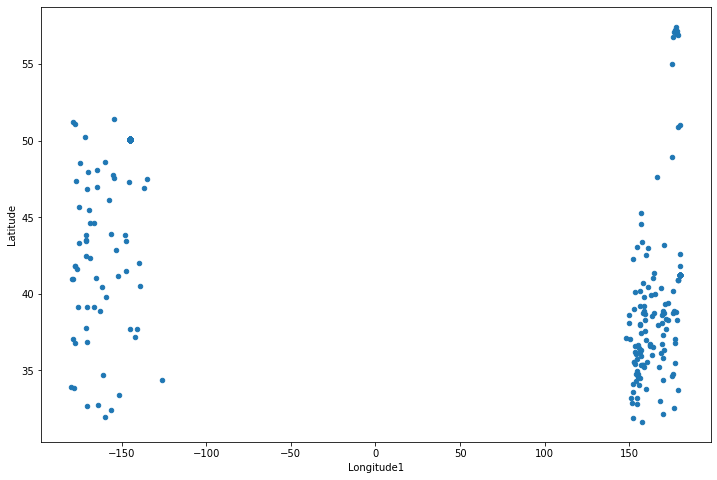

In [61]:
# Plot of long/lat to see general geographic distribution of data

day2011.plot.scatter('Longitude1', 'Latitude')

<AxesSubplot:xlabel='SST', ylabel='Salinity'>

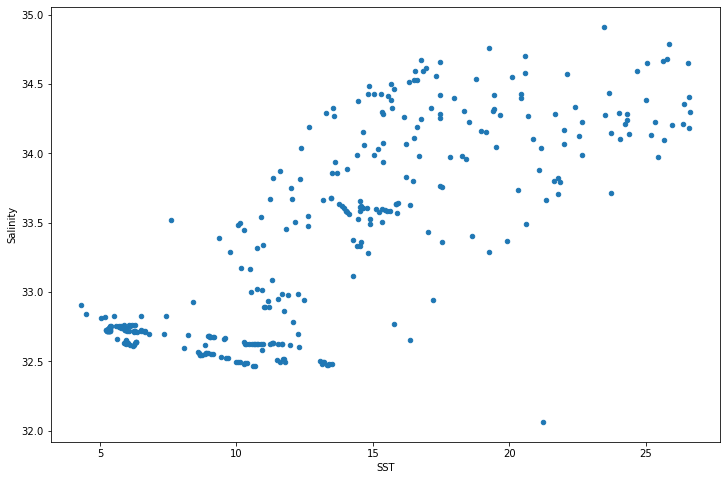

In [62]:
# Testing plots

day2011.plot.scatter('SST', 'Salinity')

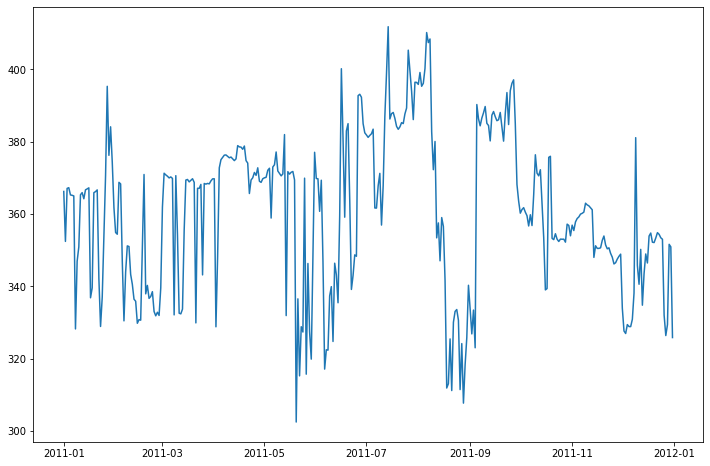

In [63]:
# Testing plots

plt.plot(day2011["fCO2rec"])

/home/fid000/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='fCO2rec'>

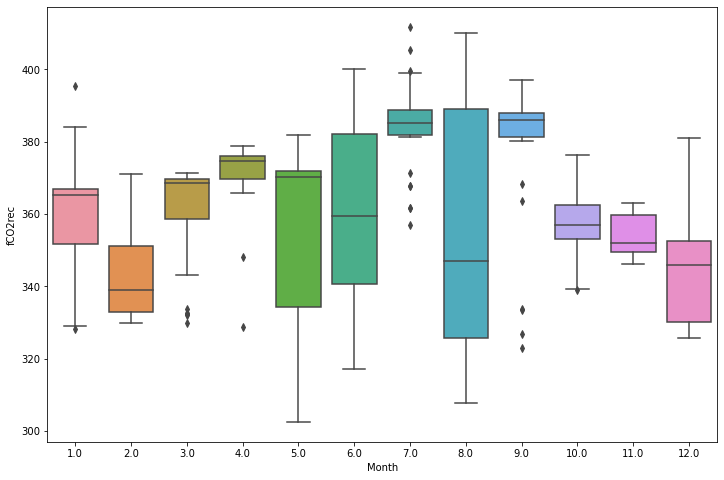

In [64]:
# Testing plots

sns.boxplot(day2011['Month'],
            day2011['fCO2rec'])

In [65]:
# Plot fCO2 data in map form
day2011.head(5)

,Year,Month,Day,Hour,Minute,Seconds,Longitude,Latitude,Sample_Depth,Salinity,SST,Tequ,PPPP,Pequ,WOA_SSS,NCEP_SLP,ETOPO2_Depth,Dist_to_land,GVCO2,xCO2water_equ_dry,xCO2water_SST_dry,pCO2water_equ_wet,pCO2water_SST_wet,fCO2water_equ_wet,fCO2water_SST_wet,fCO2rec,fCO2rec_src,fCO2rec_flag,Longitude1
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01,2011.0,1.0,1.0,10.500000,17.000000,0.0,215.107000,50.05000,NaN,32.637000,6.320000,NaN,NaN,1010.487500,32.624000,1010.200000,4185.000000,944.000000,394.911000,NaN,372.200000,NaN,367.737500,NaN,366.262500,366.255875,2.000000,2.0,-144.893000
2011-01-02,2011.0,1.0,2.0,7.750000,21.333333,0.0,188.892418,43.50025,5.0,33.337083,10.990833,20.5125,1017.25,1013.513333,33.342333,1012.966667,4121.166667,758.333333,394.305667,334.145,358.654167,NaN,353.857500,326.5575,352.515000,352.446250,1.666667,2.0,-171.107582
2011-01-03,2011.0,1.0,3.0,10.500000,17.000000,0.0,215.107000,50.05000,NaN,32.638500,6.300000,NaN,NaN,1002.300000,32.624000,1000.975000,4185.000000,944.000000,394.911000,NaN,376.125000,NaN,368.562500,NaN,367.087500,367.104125,2.000000,2.0,-144.893000
2011-01-04,2011.0,1.0,4.0,10.500000,17.000000,0.0,215.107000,50.05000,NaN,32.639000,6.300000,NaN,NaN,1003.600000,32.624000,1004.725000,4185.000000,944.000000,394.934750,NaN,375.837500,NaN,368.775000,NaN,367.300000,367.304125,2.000000,2.0,-144.893000
2011-01-05,2011.0,1.0,5.0,10.285714,17.000000,0.0,215.107000,50.05000,NaN,32.631714,6.282857,NaN,NaN,1003.485714,32.624000,1004.900000,4185.000000,944.000000,395.101000,NaN,373.828571,NaN,366.757143,NaN,365.271429,365.301714,2.000000,2.0,-144.893000


In [77]:
day2011.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2011-01-01 to 2011-12-31
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               365 non-null    float64
 1   Month              365 non-null    float64
 2   Day                365 non-null    float64
 3   Hour               365 non-null    float64
 4   Minute             365 non-null    float64
 5   Seconds            365 non-null    float64
 6   Longitude          365 non-null    float64
 7   Latitude           365 non-null    float64
 8   Sample_Depth       15 non-null     float64
 9   Salinity           365 non-null    float64
 10  SST                365 non-null    float64
 11  Tequ               279 non-null    float64
 12  PPPP               188 non-null    float64
 13  Pequ               365 non-null    float64
 14  WOA_SSS            365 non-null    float64
 15  NCEP_SLP           365 non-null    float64
 16  ETOPO2_

In [66]:
# Find min and max of lat and long

min(day2011.Latitude)

31.631657016129033

In [57]:
sns.set(style = 'whitegrid', palette = 'pastel', color_codes = True) 
sns.mpl.rc('figure', figsize=(10,6))

In [68]:
lon = day2011['Longitude1'][:]
lat = day2011['Latitude'][:]
co2 = day2011['fCO2rec'][:]


In [50]:
pip install matplotlib-colorbar

Note: you may need to restart the kernel to use updated packages.


In [72]:
data = day2011.to_xarray()
data.info()

xarray.Dataset {
dimensions:
	Date = 365 ;

variables:
	datetime64[ns] Date(Date) ;
	float64 Year(Date) ;
	float64 Month(Date) ;
	float64 Day(Date) ;
	float64 Hour(Date) ;
	float64 Minute(Date) ;
	float64 Seconds(Date) ;
	float64 Longitude(Date) ;
	float64 Latitude(Date) ;
	float64 Sample_Depth(Date) ;
	float64 Salinity(Date) ;
	float64 SST(Date) ;
	float64 Tequ(Date) ;
	float64 PPPP(Date) ;
	float64 Pequ(Date) ;
	float64 WOA_SSS(Date) ;
	float64 NCEP_SLP(Date) ;
	float64 ETOPO2_Depth(Date) ;
	float64 Dist_to_land(Date) ;
	float64 GVCO2(Date) ;
	float64 xCO2water_equ_dry(Date) ;
	float64 xCO2water_SST_dry(Date) ;
	float64 pCO2water_equ_wet(Date) ;
	float64 pCO2water_SST_wet(Date) ;
	float64 fCO2water_equ_wet(Date) ;
	float64 fCO2water_SST_wet(Date) ;
	float64 fCO2rec(Date) ;
	float64 fCO2rec_src(Date) ;
	float64 fCO2rec_flag(Date) ;
	float64 Longitude1(Date) ;

// global attributes:
}

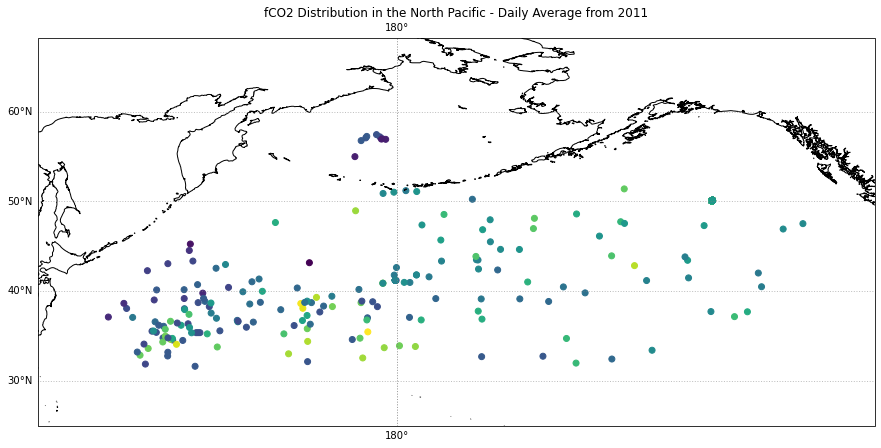

In [76]:
figure = plt.figure(figsize = (15, 15))
mapo='viridis'
ax = plt.subplot(1,1,1,projection = ccrs.PlateCarree(central_longitude=180))
ax.coastlines(resolution = '10m')
#ax.set_extent([lon-10,lon+10,lat-10,lat+10],ccrs.PlateCarree())
ax.set_extent([-126.75, 140, 25, 60])
ax.gridlines(draw_labels = True, linewidth = 1, color = 'gray', alpha = 0.5, linestyle = ':')
data.plot.scatter(x='Longitude1',y='Latitude',c=co2,marker='o', cmap=mapo,
                 transform=ccrs.PlateCarree())
#plt.colorbar(co2, orientation = 'vertical', label = 'fCO2')
ax.set_title('fCO2 Distribution in the North Pacific - Daily Average from 2011')
plt.show()